<a href="https://colab.research.google.com/github/charlieskc/MachineLearning/blob/master/HK_Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hong Kong COVID-19 Analysis (based on age group)

Data downloaded from: http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv

There are many statistics about COVID-19 in Hong Kong however there are not much statistic based on age group. This notebook aims to provide COVID-10 mortality statistics based on age group.



In [19]:
#dataset refresh everyday from the website
!rm enhanced_sur_covid_19_eng.csv*
!wget http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
#!wget http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv
!ls -lh
!wc -l enhanced_sur_covid_19_eng.csv

--2020-08-28 06:55:49--  http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Resolving www.chp.gov.hk (www.chp.gov.hk)... 104.19.254.59, 104.19.253.59, 2606:4700::6813:fd3b, ...
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.254.59|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv [following]
--2020-08-28 06:55:49--  https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.254.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘enhanced_sur_covid_19_eng.csv’

enhanced_sur_covid_     [ <=>                ] 433.40K  --.-KB/s    in 0.04s   

2020-08-28 06:55:49 (10.7 MB/s) - ‘enhanced_sur_covid_19_eng.csv’ saved [443803]

total 444K
drwx------ 4 root root 4.0K Aug 28 06:47 drive
-rw-r--r-- 1 root root 434K Aug 27 16:15 enhanced_sur_covid_19_eng.csv
drw

# Import Packages

In [20]:
'''
Normally you do not need to install pandas, uncomment if pandas is missing
'''
#install pandas 
#!pip install pandas

#load packages
import sys 
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
import datetime
from IPython.display import display

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


# Load Data Files

##Age group engineering:
1. Age is categorized into age_bins. Grouping based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1


In [21]:
df = pd.read_csv('/content/enhanced_sur_covid_19_eng.csv')
df['Report date'] =  pd.to_datetime(df['Report date'], format='%d/%m/%Y')

#df1 = pd.read_csv('/content/latest_situation_of_reported_cases_covid_19_eng.csv')

#categorize age into age group. age group based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1
ageBin= [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,100]
df['age_bins'] = pd.cut(x=df['Age'], bins=ageBin)

#preview data
df.sample(5) 

#print(df.dtypes)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
3057,3058,2020-07-30,26/07/2020,M,24,NaN,Discharged,HK Resident,Local case,Confirmed,"(19, 24]"
4516,4517,2020-08-17,Asymptomatic,M,54,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(49, 54]"
2389,2390,2020-07-25,23/07/2020,M,60,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(59, 64]"
1856,1857,2020-07-19,14/07/2020,F,47,NaN,Discharged,HK Resident,Local case,Confirmed,"(44, 49]"
3565,3566,2020-08-03,Asymptomatic,F,49,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(44, 49]"


# Data Description

In [22]:
df.describe(include = 'all')


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
count,4756.00000,4756,4756,4756,4756.000000,0.0,4756,4756,4756,4756,4745
unique,NaN,179,176,2,NaN,NaN,5,5,6,2,20
top,NaN,2020-07-30 00:00:00,Asymptomatic,F,NaN,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(59, 64]"
freq,NaN,149,1094,2380,NaN,NaN,4200,3247,2124,4755,425
first,NaN,2020-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-08-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2378.50000,NaN,NaN,NaN,44.072330,NaN,NaN,NaN,NaN,NaN,NaN
std,1373.08327,NaN,NaN,NaN,20.304046,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1189.75000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN


#Statistics - Gender

[Text(0, 0.5, 'No. of infections')]

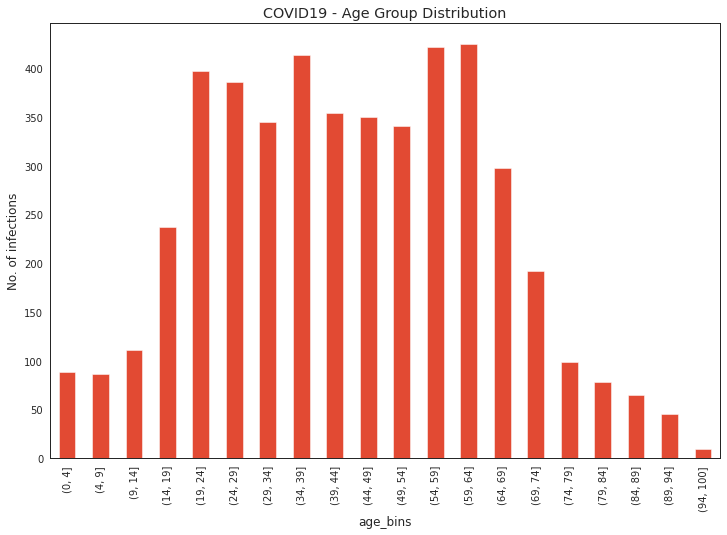

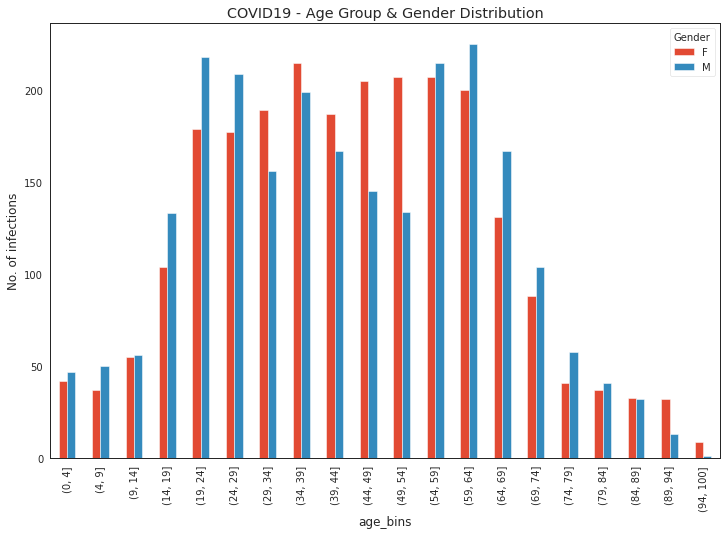

In [23]:
ax1 = df.groupby(['age_bins']).size().plot(title='COVID19 - Age Group Distribution', kind='bar')
ax1.set(ylabel='No. of infections')

#df.groupby(['Hospitalised/Discharged/Deceased']).size().plot(title='COVID19 Gender Distribution', kind='bar')
#df.groupby(['Gender']).size().plot(title='COVID19 Gender Distribution', kind='bar')


ax2 = pd.crosstab(df['age_bins'],df['Gender']).plot(title='COVID19 - Age Group & Gender Distribution', kind='bar')
ax2.set(ylabel='No. of infections')

#pd.crosstab(df['Gender'],df['Hospitalised/Discharged/Deceased']).plot.bar()


# Statistics - Case Fatality Rate
In epidemiology, a case fatality rate (CFR) — sometimes called case fatality risk or case-fatality ratio — is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period. 

https://en.wikipedia.org/wiki/Case_fatality_rate

[Text(0, 0.5, 'Case Fatality Rate')]

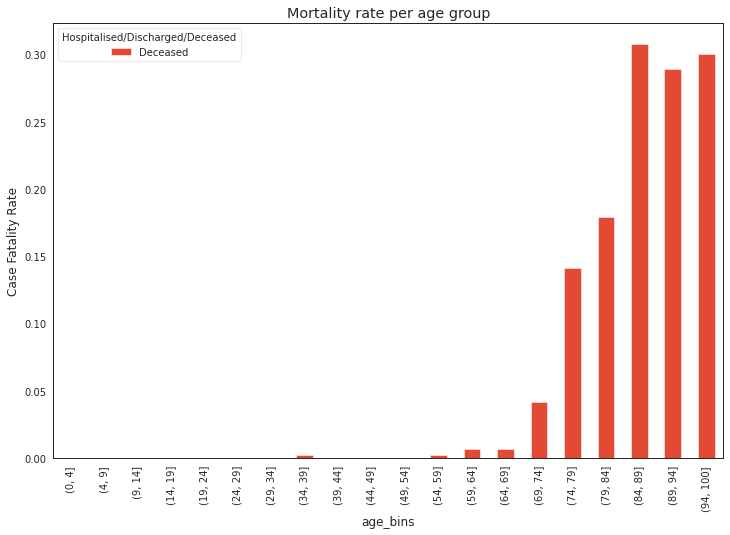

In [24]:
#No. of deceased per Age group
df_deceased = df[df['Hospitalised/Discharged/Deceased']=='Deceased']

m_rate = round(len(df_deceased) / len(df), 4)
display(IPython.display.HTML('<h2>Case fatality rate: ' + str(m_rate) + '</h2>'))

#case fatality rate
df_ratio = pd.crosstab(df['age_bins'],df['Hospitalised/Discharged/Deceased']).apply(lambda r: r/r.sum(), axis=1)
ax=df_ratio[['Deceased']].plot(title='Mortality rate per age group', kind='bar')
ax.set(ylabel='Case Fatality Rate')


Hospitalised/Discharged/Deceased  age_bins 
Deceased                          (0, 4]        0
                                  (4, 9]        0
                                  (9, 14]       0
                                  (14, 19]      0
                                  (19, 24]      0
                                  (24, 29]      0
                                  (29, 34]      0
                                  (34, 39]      1
                                  (39, 44]      0
                                  (44, 49]      0
                                  (49, 54]      0
                                  (54, 59]      1
                                  (59, 64]      3
                                  (64, 69]      2
                                  (69, 74]      8
                                  (74, 79]     14
                                  (79, 84]     14
                                  (84, 89]     20
                                  (89, 94]     13
      

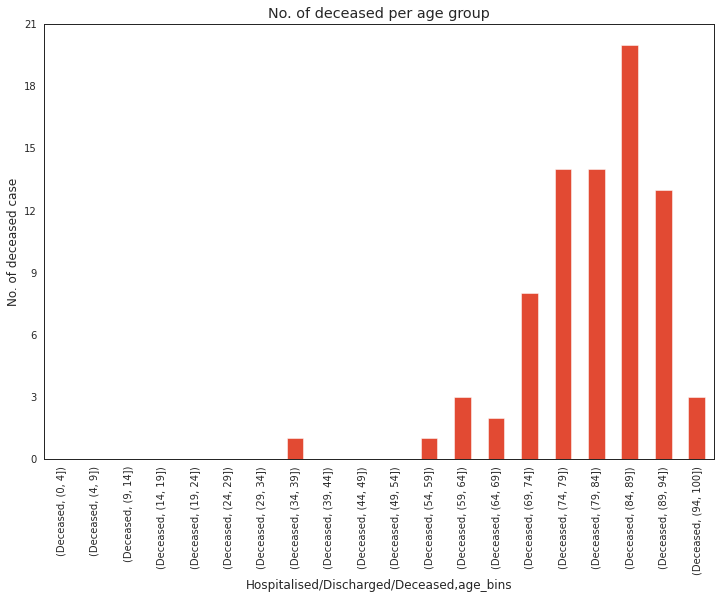

In [25]:
display(IPython.display.HTML('<h2> Total no. of deceased: ' + str(len(df_deceased)) +  '</h2>'))

display(df_deceased.groupby(['Hospitalised/Discharged/Deceased','age_bins']).size())
ax=df_deceased.groupby(['Hospitalised/Discharged/Deceased','age_bins']).size().plot(title='No. of deceased per age group', kind='bar')
ax.set(ylabel='No. of deceased case')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))


In [26]:
#Ratio Breakdown
display(df_ratio)



Hospitalised/Discharged/Deceased,Deceased,Discharged,Hospitalised,No admission,To be provided
age_bins,,,,,
"(0, 4]",0.000000,0.898876,0.101124,0.000000,0.000000
"(4, 9]",0.000000,0.919540,0.080460,0.000000,0.000000
"(9, 14]",0.000000,0.927928,0.054054,0.000000,0.018018
"(14, 19]",0.000000,0.953586,0.037975,0.004219,0.004219
"(19, 24]",0.000000,0.934509,0.055416,0.005038,0.005038
"(24, 29]",0.000000,0.924870,0.051813,0.018135,0.005181
"(29, 34]",0.000000,0.942029,0.034783,0.017391,0.005797
"(34, 39]",0.002415,0.920290,0.065217,0.009662,0.002415
"(39, 44]",0.000000,0.929379,0.064972,0.000000,0.005650


Report date
2020-08-21    27
2020-08-22    26
2020-08-23    25
2020-08-24     9
2020-08-25    19
2020-08-26    24
2020-08-27    21
dtype: int64

[Text(0, 0.5, 'No. of infections')]

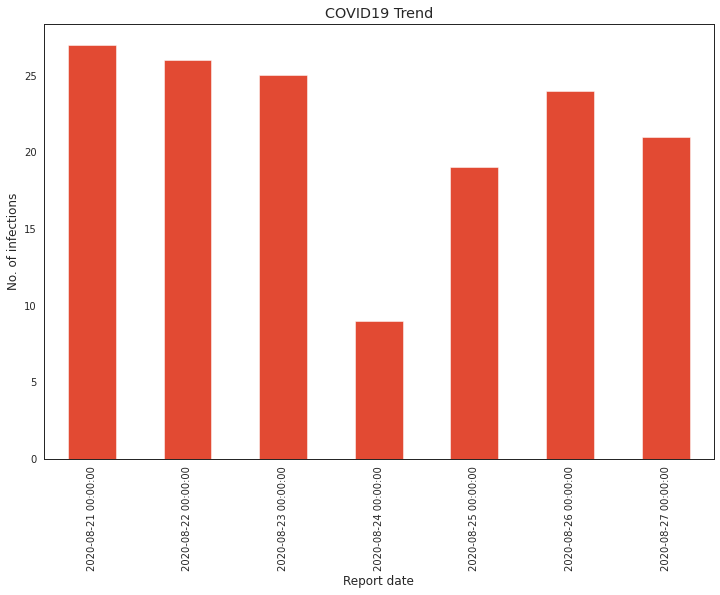

In [27]:
df_7days = df[df['Report date'] > datetime.datetime.now() - pd.to_timedelta("8day")]
df_7days_grouped = df_7days.groupby(['Report date']).size()

display(df_7days_grouped)

ax = df_7days_grouped.plot(title='COVID19 Trend', kind='bar')
ax.set(ylabel='No. of infections')

